# imports

In [1]:
import pandas as pd
import numpy as np
import sklearn
import pickle 
import time 
import datetime
import warnings
from autogluon.tabular import TabularDataset, TabularPredictor

warnings.filterwarnings('ignore')

In [2]:
df_train1 = pd.read_csv('~/Dropbox/Data/df_train1.csv')
df_train2 = pd.read_csv('~/Dropbox/Data/df_train2.csv')
df_train3 = pd.read_csv('~/Dropbox/Data/df_train3.csv')
df_train4 = pd.read_csv('~/Dropbox/Data/df_train4.csv')
df_train5 = pd.read_csv('~/Dropbox/Data/df_train5.csv')
df_train6 = pd.read_csv('~/Dropbox/Data/df_train6.csv')
df_train7 = pd.read_csv('~/Dropbox/Data/df_train7.csv')
df_train8 = pd.read_csv('~/Dropbox/Data/df_train8.csv')
df_test = pd.read_csv('~/Dropbox/Data/df_test.csv')

In [3]:
(df_train1.shape, df_train1.is_fraud.mean()), (df_test.shape, df_test.is_fraud.mean())

(((734003, 22), 0.005728859418830713), ((314572, 22), 0.005725239372862174))

In [4]:
_df1 = pd.concat([df_train1, df_test])
_df2 = pd.concat([df_train2, df_test])
_df3 = pd.concat([df_train3, df_test])
_df4 = pd.concat([df_train4, df_test])
_df5 = pd.concat([df_train5, df_test])
_df6 = pd.concat([df_train6, df_test])
_df7 = pd.concat([df_train7, df_test])
_df8 = pd.concat([df_train8, df_test])

In [5]:
_df1_mean = _df1.is_fraud.mean()
_df2_mean = _df2.is_fraud.mean()
_df3_mean = _df3.is_fraud.mean()
_df4_mean = _df4.is_fraud.mean()
_df5_mean = _df5.is_fraud.mean()
_df6_mean = _df6.is_fraud.mean()
_df7_mean = _df7.is_fraud.mean()
_df8_mean = _df8.is_fraud.mean()

In [8]:
df_tr = df_train4[["amt","is_fraud"]]
df_tst = df_80[["amt","is_fraud"]]     
tr = TabularDataset(df_tr)
tst = TabularDataset(df_tst)
predictr = TabularPredictor(label="is_fraud", verbosity=1)
t1 = time.time()
predictr.fit(tr)

No path specified. Models will be saved in: "AutogluonModels/ag-20240520_100601/"
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


In [16]:
predictr.calibrate_decision_threshold()

0.5

In [24]:
predictr.predict(df_80)

0         0
1         0
2         0
3         0
5         0
         ..
314538    0
314558    0
314563    0
314566    0
314571    0
Name: is_fraud, Length: 231011, dtype: int64

In [39]:
yyhat_prob = predictr.predict_proba(df_80).iloc[:,-1]
yy = df_80.is_fraud

In [49]:
_df = df_80.assign(yyhat_prob= yyhat_prob)\
.loc[:,['amt','is_fraud','yyhat_prob']]

In [50]:
import sklearn.metrics

In [51]:
sklearn.metrics.roc_auc_score(yy,yyhat_prob)

0.886678870980294

In [52]:
_df[_df.is_fraud == 1].yyhat_prob.mean()

0.3329286185951976

In [54]:
_df[_df.is_fraud == 1].amt.mean()

16.30444155844156

<AxesSubplot: >

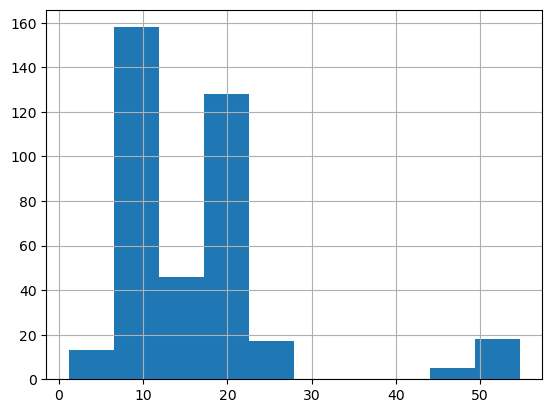

In [56]:
_df[_df.is_fraud == 1].amt.hist()

In [53]:
_df[_df.is_fraud == 0].yyhat_prob.mean()

0.2986325147135913

In [55]:
_df[_df.is_fraud == 0].amt.mean()

31.54455620788636

<AxesSubplot: >

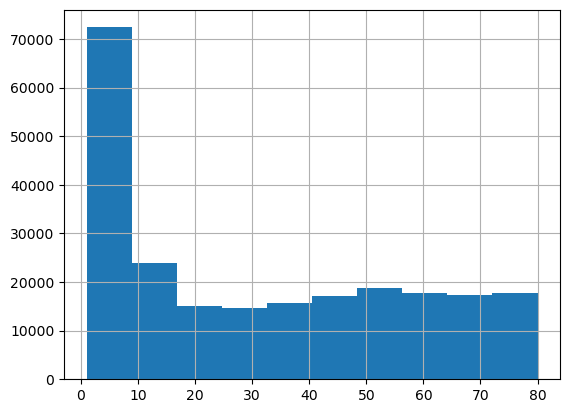

In [57]:
_df[_df.is_fraud == 0].amt.hist()

In [23]:
predictr.predict_proba_multi()

{'KNeighborsUnif':          0    1
 13979  1.0  0.0
 24323  1.0  0.0
 23007  1.0  0.0
 37276  1.0  0.0
 31070  1.0  0.0
 ...    ...  ...
 36224  1.0  0.0
 34032  1.0  0.0
 34720  1.0  0.0
 17138  1.0  0.0
 25898  1.0  0.0
 
 [2500 rows x 2 columns],
 'KNeighborsDist':          0    1
 13979  1.0  0.0
 24323  1.0  0.0
 23007  1.0  0.0
 37276  1.0  0.0
 31070  1.0  0.0
 ...    ...  ...
 36224  1.0  0.0
 34032  1.0  0.0
 34720  1.0  0.0
 17138  1.0  0.0
 25898  1.0  0.0
 
 [2500 rows x 2 columns],
 'ExtraTreesEntr':          0    1
 13979  1.0  0.0
 24323  1.0  0.0
 23007  1.0  0.0
 37276  1.0  0.0
 31070  1.0  0.0
 ...    ...  ...
 36224  1.0  0.0
 34032  1.0  0.0
 34720  1.0  0.0
 17138  1.0  0.0
 25898  1.0  0.0
 
 [2500 rows x 2 columns],
 'LightGBM':               0         1
 13979  0.967662  0.032338
 24323  0.965496  0.034504
 23007  0.969491  0.030509
 37276  0.956655  0.043345
 31070  0.969491  0.030509
 ...         ...       ...
 36224  0.967500  0.032500
 34032  0.969491  0.03

In [6]:
def auto_amt_ver0503(df_tr, df_tst, _df_mean):
    df_tr = df_tr[["amt","is_fraud"]]
    df_tst = df_tst[["amt","is_fraud"]]     
    tr = TabularDataset(df_tr)
    tst = TabularDataset(df_tst)
    predictr = TabularPredictor(label="is_fraud", verbosity=1)
    t1 = time.time()
    predictr.fit(tr)
    t2 = time.time()
    time_diff = t2 - t1
    models = predictr._trainer.model_graph.nodes
    results = []
    for model_name in models:
    # 모델 평가
        eval_result = predictr.evaluate(tst, model=model_name)

    # 결과를 데이터프레임에 추가
        results.append({'model': model_name, 
                        'acc': eval_result['accuracy'], 
                        'pre': eval_result['precision'], 
                        'rec': eval_result['recall'], 
                        'f1': eval_result['f1'], 
                        'auc': eval_result['roc_auc']})
        
    model = []
    time_diff = []
    acc = []
    pre = []
    rec = []
    f1 = [] 
    auc = [] 
    graph_based = []
    method = [] 
    throw_rate = [] 
    train_size = []
    train_cols = []
    train_frate = []
    test_size = []
    test_frate = []
    hyper_params = [] 
    
    for result in results:
        model_name = result['model']
        model.append(model_name)
        time_diff.append(None)  # 각 모델별로 학습한 시간을 나타내고 싶은데 잘 안됨
        acc.append(result['acc']) 
        pre.append(result['pre'])
        rec.append(result['rec'])
        f1.append(result['f1'])
        auc.append(result['auc'])
        graph_based.append(False) 
        method.append('Autogluon') 
        throw_rate.append(_df_mean)
        train_size.append(len(tr))
        train_cols.append([col for col in tr.columns if col != 'is_fraud'])
        train_frate.append(tr.is_fraud.mean())
        test_size.append(len(tst))
        test_frate.append(tst.is_fraud.mean())
        hyper_params.append(None)
        
    df_results = pd.DataFrame(dict(
        model=model,
        time=time_diff,
        acc=acc,
        pre=pre,
        rec=rec,
        f1=f1,
        auc=auc,
        graph_based=graph_based,
        method=method,
        throw_rate=throw_rate,  
        train_size=train_size,
        train_cols=train_cols,
        train_frate=train_frate,
        test_size=test_size,
        test_frate=test_frate,
        hyper_params=hyper_params
    ))    
    ymdhms = datetime.datetime.fromtimestamp(time.time()).strftime('%Y%m%d-%H%M%S') 
    df_results.to_csv(f'../results2/{ymdhms}-Autogluon.csv',index=False)
    return df_results

# amt 80 미만 잘 잡는지 확인용..

In [7]:
df_80 = df_test[df_test['amt'] <= 80]

In [16]:
df_80.shape, df_80.is_fraud.mean()

((231011, 22), 0.0016665873053664112)

In [7]:
_df1_ = pd.concat([df_train1, df_80])
_df2_ = pd.concat([df_train2, df_80])
_df3_ = pd.concat([df_train3, df_80])
_df4_ = pd.concat([df_train4, df_80])
_df5_ = pd.concat([df_train5, df_80])
_df6_ = pd.concat([df_train6, df_80])
_df7_ = pd.concat([df_train7, df_80])
_df8_ = pd.concat([df_train8, df_80])

In [8]:
_df1_mean_ = _df1_.is_fraud.mean()
_df2_mean_ = _df2_.is_fraud.mean()
_df3_mean_ = _df3_.is_fraud.mean()
_df4_mean_ = _df4_.is_fraud.mean()
_df5_mean_ = _df5_.is_fraud.mean()
_df6_mean_ = _df6_.is_fraud.mean()
_df7_mean_ = _df7_.is_fraud.mean()
_df8_mean_ = _df8_.is_fraud.mean()